# Used Car Prices

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')

## Data Overview

In [3]:
df = pd.read_csv('data/Used_Car_Price_Prediction.csv')

In [4]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,assured_buy,registered_city,registered_state,is_hot,rto,source,make,model,car_availability,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,True,delhi,delhi,True,dl6c,inperson_sale,maruti,swift,in_stock,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,True,noida,uttar pradesh,True,up16,inperson_sale,maruti,alto 800,in_stock,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,True,agra,uttar pradesh,True,up80,inperson_sale,hyundai,grand i10,in_stock,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,True,delhi,delhi,True,dl1c,inperson_sale,maruti,swift,in_stock,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,False,new delhi,delhi,True,dl12,inperson_sale,hyundai,grand i10,in_stock,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             7400 non-null   object 
 1   yr_mfr               7400 non-null   int64  
 2   fuel_type            7400 non-null   object 
 3   kms_run              7400 non-null   int64  
 4   sale_price           7400 non-null   int64  
 5   city                 7400 non-null   object 
 6   times_viewed         7400 non-null   int64  
 7   body_type            7297 non-null   object 
 8   transmission         6844 non-null   object 
 9   variant              7400 non-null   object 
 10  assured_buy          7400 non-null   bool   
 11  registered_city      7390 non-null   object 
 12  registered_state     7390 non-null   object 
 13  is_hot               7400 non-null   bool   
 14  rto                  7400 non-null   object 
 15  source               7274 non-null   o

In [6]:
df.describe()

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt
count,7400.000000,7400.000000,7.400000e+03,7400.000000,7400.000000,7.400000e+03,4.120000e+03,7400.000000,7400.000000
mean,2013.885676,62624.520000,4.548892e+05,1550.706081,1.327297,4.322044e+05,5.510351e+05,10565.942027,68233.529054
std,3.087613,43532.042371,2.827023e+05,2080.952842,0.579798,2.880316e+05,3.119887e+05,6566.468434,42405.389468
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,9.689900e+04,0.000000,0.000000
25%,2012.000000,31885.250000,2.811740e+05,554.750000,1.000000,2.526612e+05,3.414930e+05,6531.250000,42176.250000
50%,2014.000000,55765.000000,3.824490e+05,1088.000000,1.000000,3.611445e+05,4.674800e+05,8883.000000,57367.500000
75%,2016.000000,84184.000000,5.401490e+05,1926.500000,2.000000,5.260180e+05,6.675258e+05,12546.250000,81022.500000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,2.765057e+06,89798.000000,579901.000000


In [7]:
df.describe(include='O')

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,ad_created_on,fitness_certificate
count,7400,7400,7400,7297,6844,7400,7390,7390,7400,7274,7400,7400,6780,7391,7399,7392
unique,185,5,13,5,2,943,243,16,261,3,27,185,4,4,7398,2
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,great,2021-03-07T10:10:19.937,True
freq,535,4659,1336,4358,6215,674,963,2108,380,6834,3179,535,6485,6299,2,7247


## Missing Values

In [8]:
df.isna().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

<Axes: >

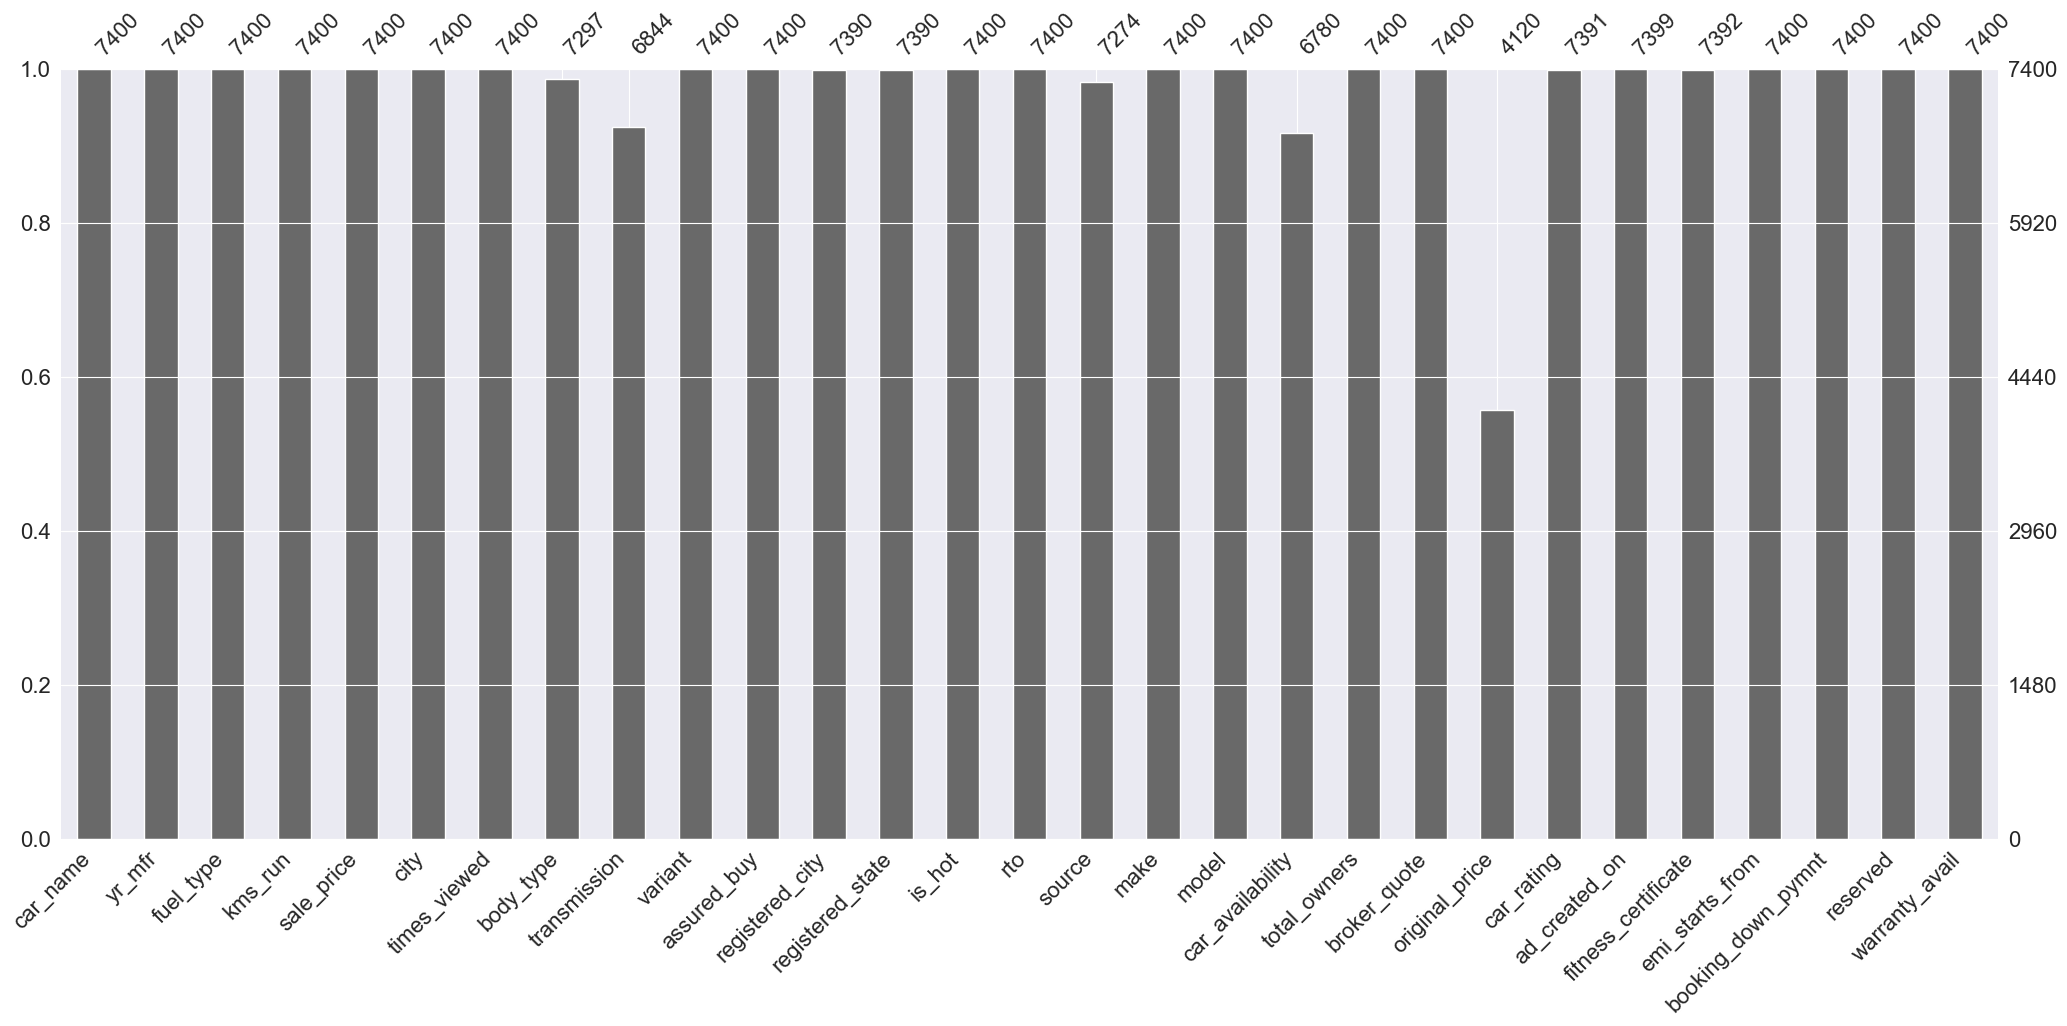

In [9]:
missingno.bar(df)

<Axes: >

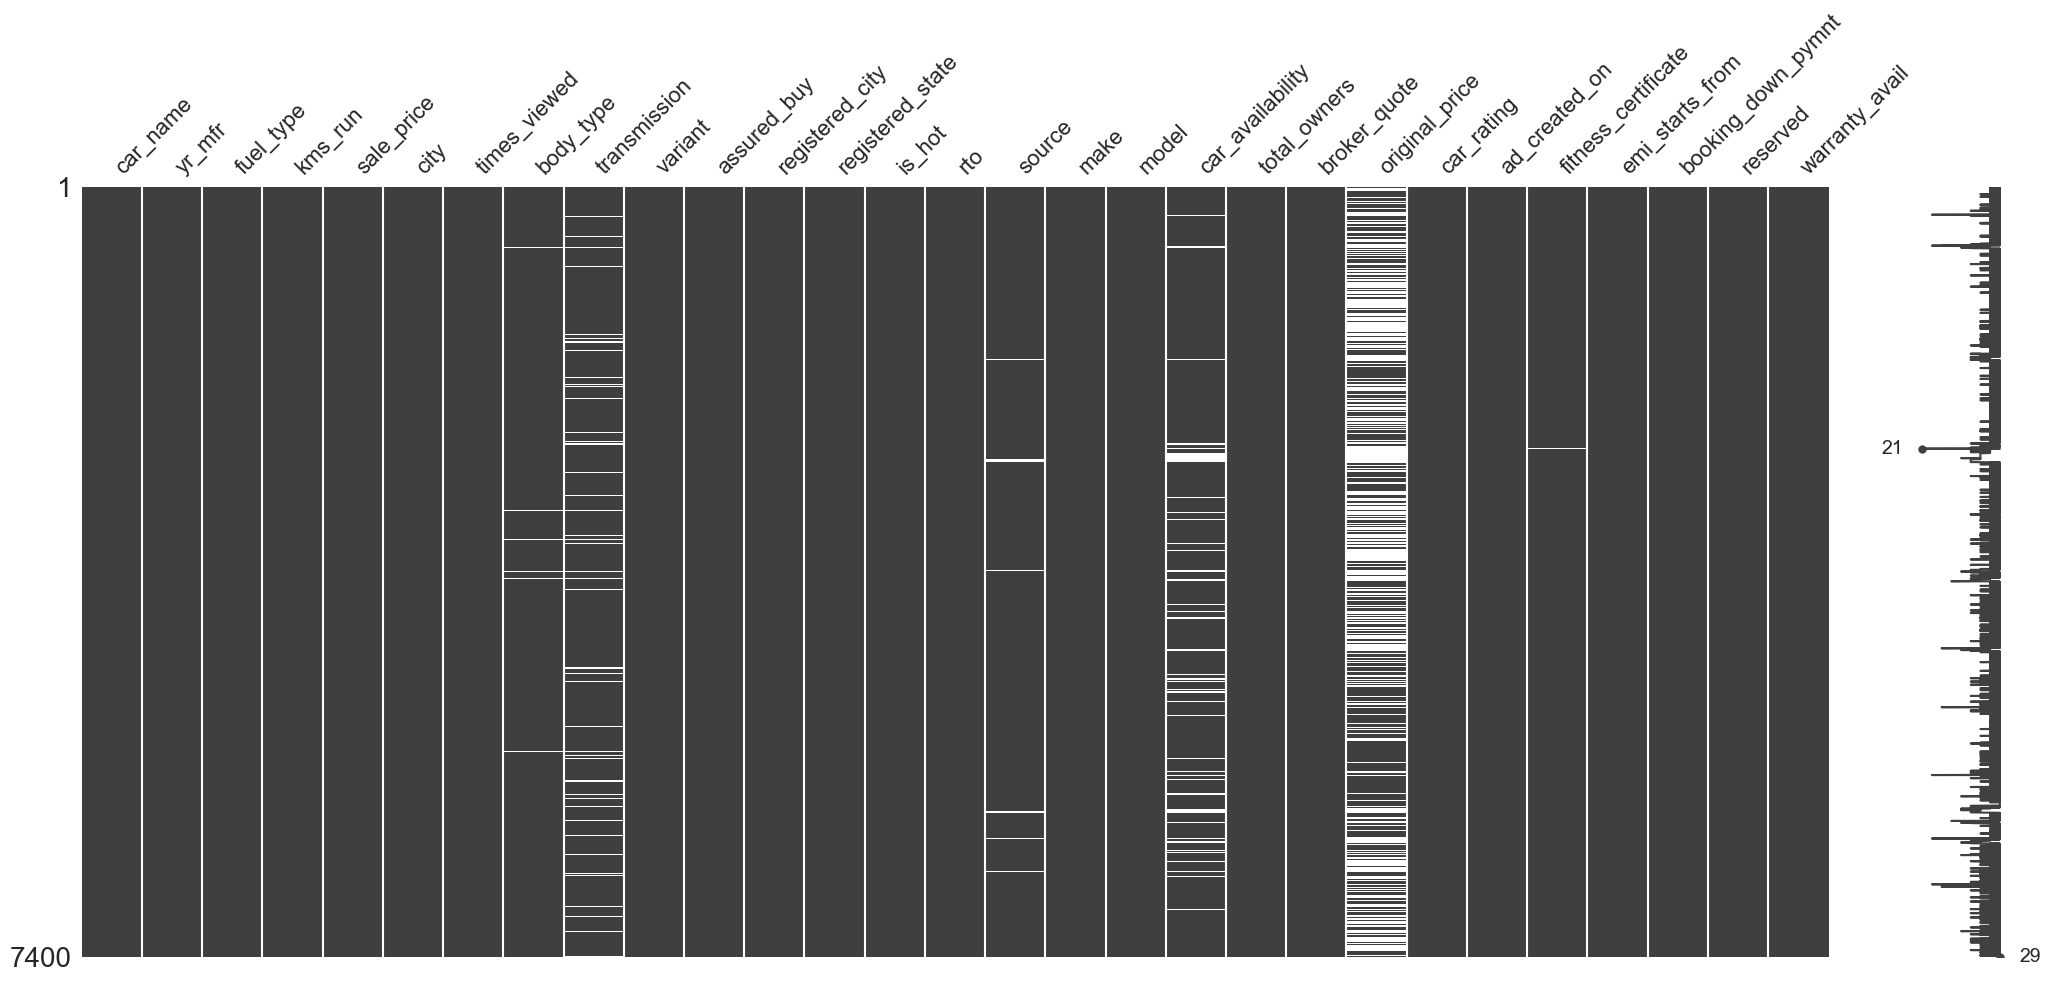

In [10]:
missingno.matrix(df)

> We can see in the above that while most columns have no/few missing values, a couple stand out as having many missing values. Namely, `transmission`, `car_availability`, and `original_price`. I will focus on these columns next to figure out how to best handle these missing values. 

### Original Price

Original price is missing 3280 values. That is 44.32% of all the values. However, this may be a key indicator for determing sale price, which will be one of our target variables. So to solve this, I will make a new column that indicates if the original price was missing, and imputer with the mean or median. 

In [11]:
df['original_price_missing'] = df['original_price'].isna().astype(int)

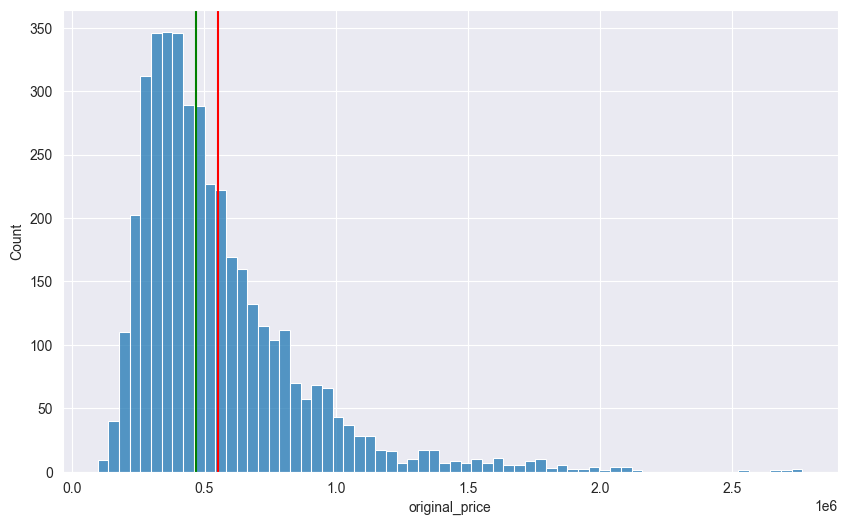

In [12]:
sns.histplot(data=df, x='original_price')
plt.axvline(x=df['original_price'].mean(), color='red')
plt.axvline(x=df['original_price'].median(), color='green')

> As this is a right skewed histogram, it would be better to use the median to impute the values by grouping by make and model. Then, if any remaining missing values, I will impute by make only. Then any remaining after that will be dropped. 

In [13]:
df['original_price'] = df.groupby(['make', 'model'])['original_price'].transform(
    lambda x: x.fillna(x.median())
)

In [14]:
df.isna().sum()

car_name                    0
yr_mfr                      0
fuel_type                   0
kms_run                     0
sale_price                  0
city                        0
times_viewed                0
body_type                 103
transmission              556
variant                     0
assured_buy                 0
registered_city            10
registered_state           10
is_hot                      0
rto                         0
source                    126
make                        0
model                       0
car_availability          620
total_owners                0
broker_quote                0
original_price             78
car_rating                  9
ad_created_on               1
fitness_certificate         8
emi_starts_from             0
booking_down_pymnt          0
reserved                    0
warranty_avail              0
original_price_missing      0
dtype: int64

In [15]:
df['original_price'] = df.groupby(['make'])['original_price'].transform(
    lambda x: x.fillna(x.median())
)

In [16]:
df.isna().sum()

car_name                    0
yr_mfr                      0
fuel_type                   0
kms_run                     0
sale_price                  0
city                        0
times_viewed                0
body_type                 103
transmission              556
variant                     0
assured_buy                 0
registered_city            10
registered_state           10
is_hot                      0
rto                         0
source                    126
make                        0
model                       0
car_availability          620
total_owners                0
broker_quote                0
original_price              7
car_rating                  9
ad_created_on               1
fitness_certificate         8
emi_starts_from             0
booking_down_pymnt          0
reserved                    0
warranty_avail              0
original_price_missing      0
dtype: int64

> After imputing the median, there are 7 rows left with missing values. We will drop those rows closer to the end after filling in the other columns.

### Car Availability

<Axes: xlabel='car_availability', ylabel='count'>

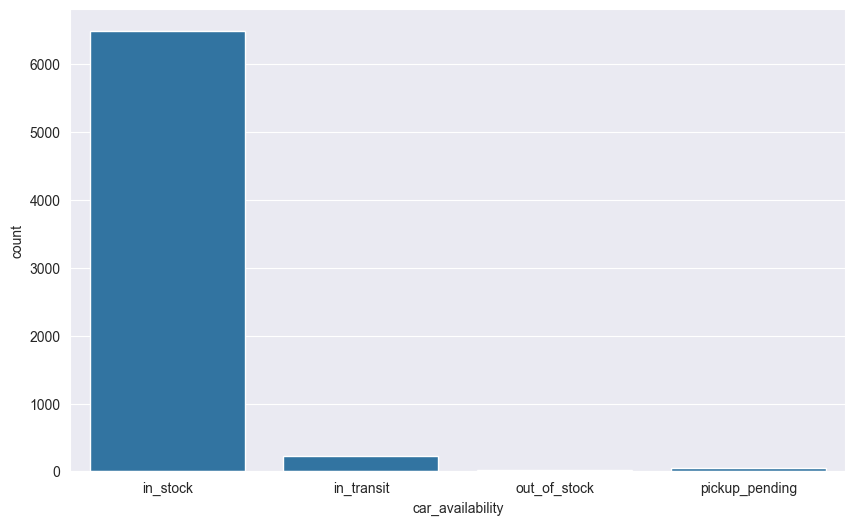

In [17]:
sns.countplot(data=df, x='car_availability')

> Like with the original price, we will make a new column that indicates the availability was missing, then impute the missing values with a new category of "unknown"

In [18]:
df['car_availability_missing'] = df['car_availability'].isna().astype(int)

In [19]:
df['car_availability'] = df['car_availability'].fillna('unknown')

In [20]:
df.isna().sum()

car_name                      0
yr_mfr                        0
fuel_type                     0
kms_run                       0
sale_price                    0
city                          0
times_viewed                  0
body_type                   103
transmission                556
variant                       0
assured_buy                   0
registered_city              10
registered_state             10
is_hot                        0
rto                           0
source                      126
make                          0
model                         0
car_availability              0
total_owners                  0
broker_quote                  0
original_price                7
car_rating                    9
ad_created_on                 1
fitness_certificate           8
emi_starts_from               0
booking_down_pymnt            0
reserved                      0
warranty_avail                0
original_price_missing        0
car_availability_missing      0
dtype: i

### Transmission

For the transmission column, 

<Axes: xlabel='transmission', ylabel='count'>

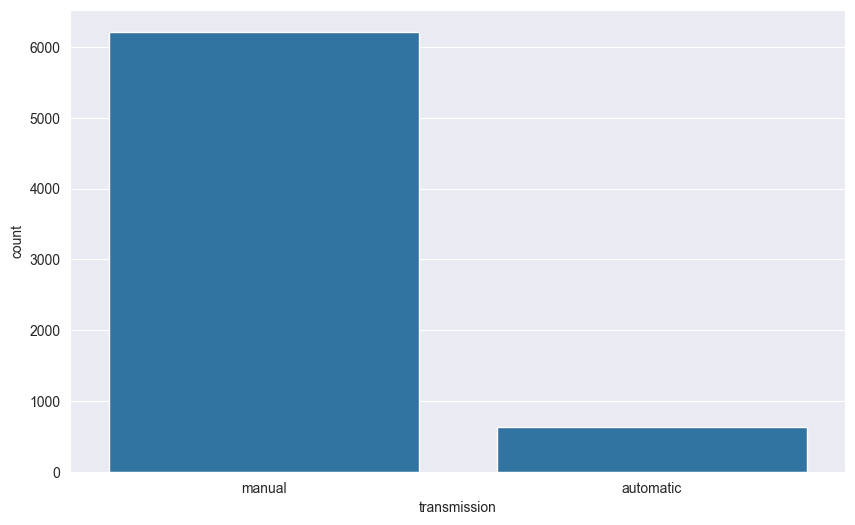

In [21]:
sns.countplot(data=df, x='transmission')

In [22]:
df['transmission_missing'] = df['transmission'].isna().astype(int)

In [23]:
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

In [24]:
df.isna().sum()

car_name                      0
yr_mfr                        0
fuel_type                     0
kms_run                       0
sale_price                    0
city                          0
times_viewed                  0
body_type                   103
transmission                  0
variant                       0
assured_buy                   0
registered_city              10
registered_state             10
is_hot                        0
rto                           0
source                      126
make                          0
model                         0
car_availability              0
total_owners                  0
broker_quote                  0
original_price                7
car_rating                    9
ad_created_on                 1
fitness_certificate           8
emi_starts_from               0
booking_down_pymnt            0
reserved                      0
warranty_avail                0
original_price_missing        0
car_availability_missing      0
transmis

### Remaining missing values

For the remaining missing values, we will drop them. 

In [25]:
df = df.dropna()

In [26]:
df.shape

(7159, 32)

In [27]:
7400 - 7159

241

In [28]:
241/7400 * 100

3.256756756756757

We ended up dropping 3.26% of the total values. 

In [29]:
df.isna().sum()

car_name                    0
yr_mfr                      0
fuel_type                   0
kms_run                     0
sale_price                  0
city                        0
times_viewed                0
body_type                   0
transmission                0
variant                     0
assured_buy                 0
registered_city             0
registered_state            0
is_hot                      0
rto                         0
source                      0
make                        0
model                       0
car_availability            0
total_owners                0
broker_quote                0
original_price              0
car_rating                  0
ad_created_on               0
fitness_certificate         0
emi_starts_from             0
booking_down_pymnt          0
reserved                    0
warranty_avail              0
original_price_missing      0
car_availability_missing    0
transmission_missing        0
dtype: int64

## Data Cleaning

In [30]:
for column in df.select_dtypes(exclude=['number']).drop(columns=['car_name', 'variant', 'ad_created_on', 'registered_city', 'rto', 'model']).columns:
    print(f"{column} - {df[column].unique()}")

fuel_type - ['petrol' 'diesel' 'petrol & cng' 'electric' 'petrol & lpg']
city - ['noida' 'gurgaon' 'bengaluru' 'new delhi' 'mumbai' 'pune' 'hyderabad'
 'chennai' 'kolkata' 'ahmedabad' 'faridabad' 'ghaziabad' 'lucknow']
body_type - ['hatchback' 'sedan' 'suv' 'luxury sedan' 'luxury suv']
transmission - ['manual' 'automatic']
assured_buy - [ True False]
registered_state - ['delhi' 'uttar pradesh' 'haryana' 'maharashtra' 'rajasthan' 'karnataka'
 'gujarat' 'jharkhand' 'punjab' 'andhra pradesh' 'chhattisgarh'
 'telangana' 'west bengal' 'tamil nadu' 'chandigarh' 'uttarakhand']
is_hot - [ True False]
source - ['inperson_sale' 'online' 'customer_to_customer']
make - ['maruti' 'hyundai' 'renault' 'honda' 'ford' 'nissan' 'toyota' 'audi'
 'tata' 'datsun' 'mahindra' 'volkswagen' 'mitsubishi' 'mercedes benz'
 'chevrolet' 'bmw' 'skoda' 'volvo' 'fiat' 'isuzu' 'ssangyong' 'jeep']
car_availability - ['in_stock' 'in_transit' 'unknown' 'out_of_stock' 'pickup_pending']
car_rating - ['great' 'good' 'fair' '

After looking through the different nominal columns, there do not seem to be any typos, so nothing there needs to be fixed

## Data Type Conversion

### Ordered Categories

There is only one column that has an order, `car_rating`

In [31]:
df['car_rating'].value_counts()

car_rating
great         6158
good           820
fair           110
overpriced      71
Name: count, dtype: int64

In [32]:
df['car_rating'] = pd.Categorical(df['car_rating'], categories=['overpriced', 'fair', 'good', 'great'], ordered=True)

### Nominal Categories

For the nominal columns, I will only convert the columns with a reasonable number of categories, and where it makes sense. The columns I have chosen are below. 
- body_type
- car_availability
- source
- fuel_type

In [33]:
df.describe(include='O')

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,ad_created_on,fitness_certificate
count,7159,7159,7159,7159,7159,7159,7159,7159,7159,7159,7159,7159,7159,7159,7159
unique,173,5,13,5,2,879,236,16,256,3,22,173,5,7158,2
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,2021-03-07T10:10:19.937,True
freq,526,4541,1308,4300,6540,669,923,2065,372,6747,3085,526,6411,2,7046


In [34]:
nominal_columns = ['fuel_type', 'source', 'car_availability', 'body_type']

In [35]:
for column in nominal_columns:
    df[column] = df[column].astype('category')

## Exploratory Data Analysis

### Questions

- How many of each body type are there?
- Does the number of previous owners influence sale price?
- What is the average amount a car has deprediated from its original value?
- What is the distribution of the saleprice?
- What is the count for each car rating?
- What make has the highest average price?
- How has the average price changed over the years (year of manufacture)

#### How many of each body type are there?

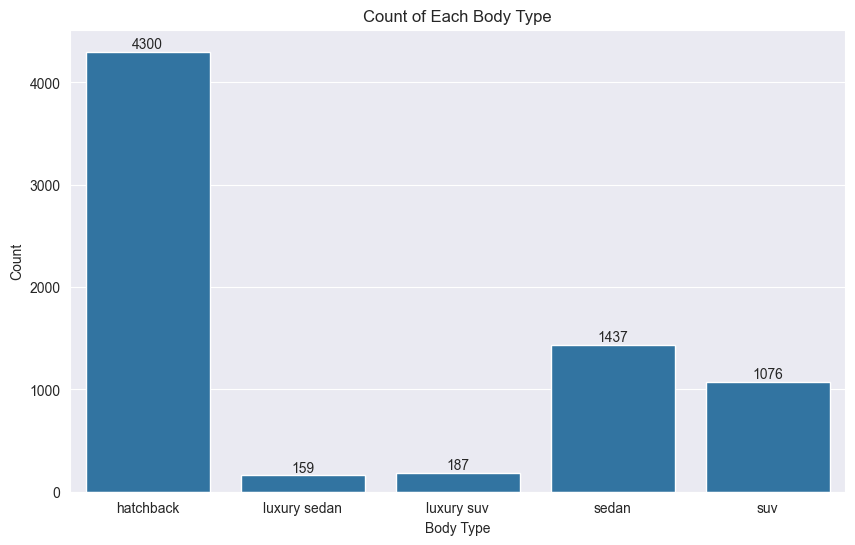

In [36]:
ax = sns.countplot(data=df, x='body_type')
ax.bar_label(ax.containers[0])
ax.set_xlabel("Body Type")
ax.set_ylabel("Count")
ax.set_title("Count of Each Body Type");

#### Does the number of previous owners influence sale price?

In [37]:
np.corrcoef(df['sale_price'], df['total_owners'])

array([[ 1.        , -0.12553846],
       [-0.12553846,  1.        ]])

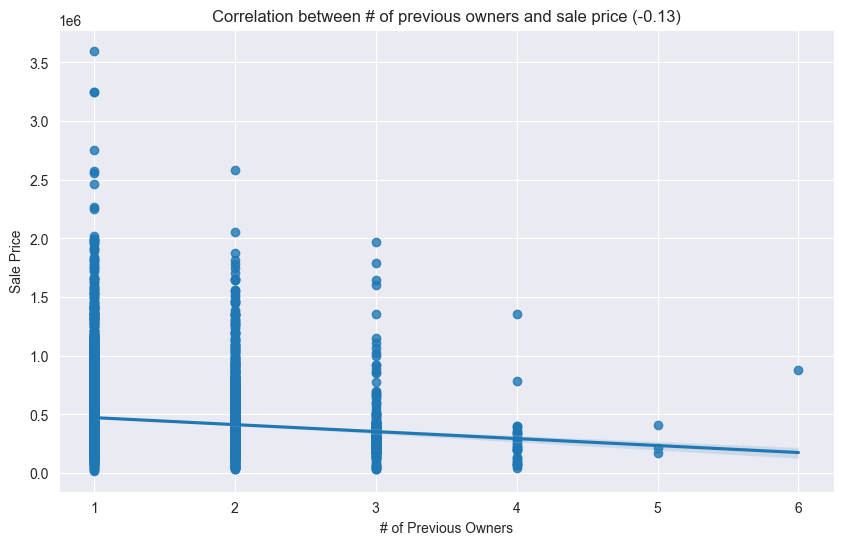

In [38]:
sns.regplot(data=df, x='total_owners', y='sale_price')
plt.xlabel("# of Previous Owners")
plt.ylabel("Sale Price")
plt.title("Correlation between # of previous owners and sale price (-0.13)");

#### What is the average amount a car has deprediated from its original value?

In [52]:
percent_deprecated = ((df['original_price'] - df['sale_price']) / df['original_price']).round(2) * 100

In [54]:
percent_deprecated.mean().round(2)

np.float64(10.41)

#### What is the distribution of the saleprice?

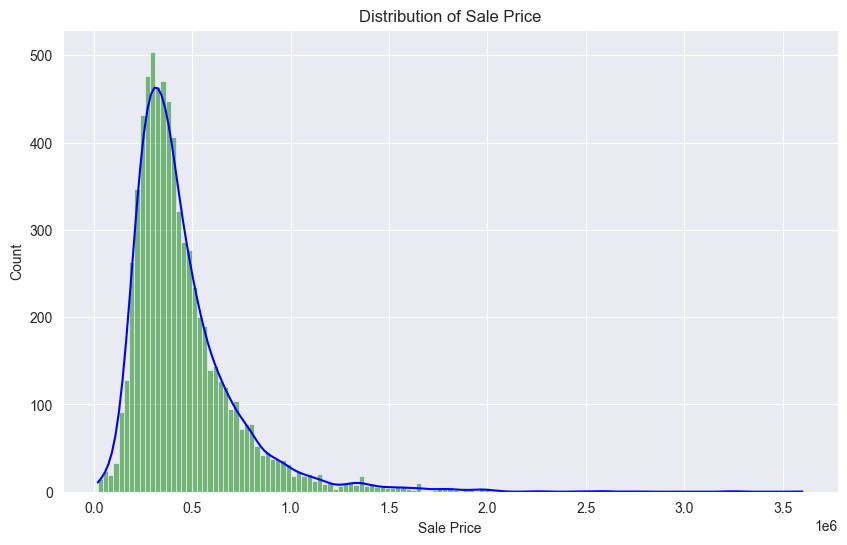

In [41]:
ax = sns.histplot(data=df, x='sale_price', color='green', kde=True)
ax.lines[0].set_color('blue')
plt.xlabel("Sale Price")
plt.title("Distribution of Sale Price");

#### What is the count for each car rating?

Text(0.5, 1.0, 'Count of Car Rating')

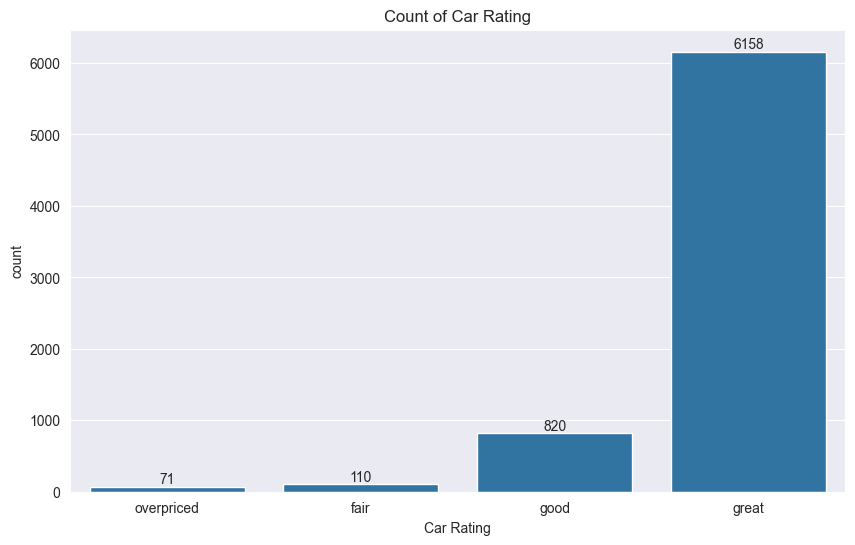

In [42]:
ax = sns.countplot(data=df, x='car_rating')
ax.bar_label(ax.containers[0])
ax.set_xlabel("Car Rating")
ax.set_title("Count of Car Rating")

#### What make has the highest average price?

In [43]:
sale_by_make = df.groupby('make')['sale_price'].mean().to_frame().sort_values(by='sale_price')
sale_by_make

,sale_price
make,
chevrolet,2.149394e+05
datsun,2.645873e+05
mitsubishi,3.070990e+05
fiat,3.239990e+05
nissan,3.745622e+05
renault,3.908484e+05
maruti,4.040011e+05
hyundai,4.196260e+05
ford,4.488540e+05


<Axes: xlabel='sale_price', ylabel='make'>

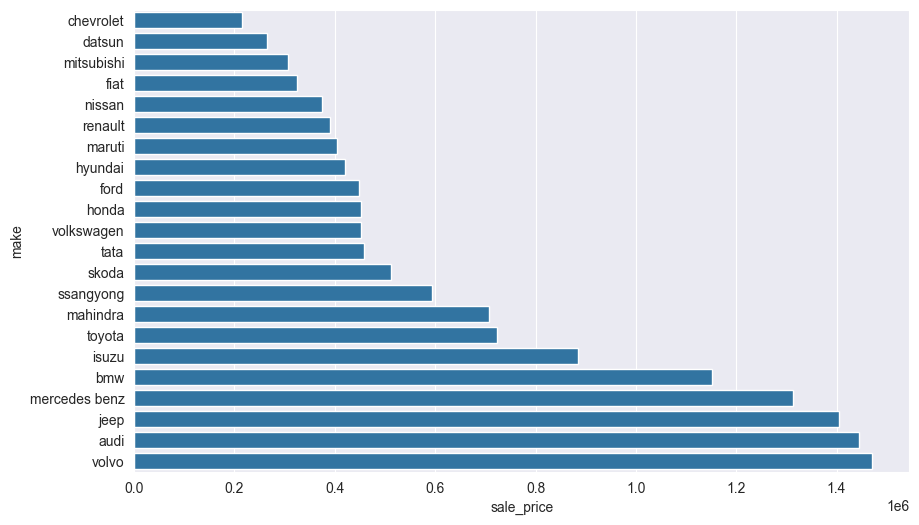

In [44]:
sns.barplot(data=sale_by_make, x='sale_price', y='make')
# plt.xticks(rotation=45);

#### How has the average price changed over the years (year of manufacture)

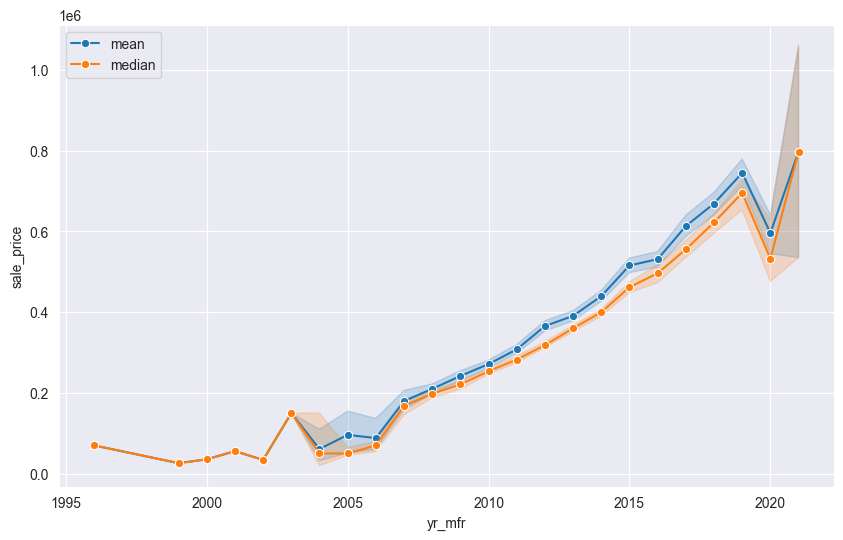

In [51]:
sns.lineplot(data=df, x='yr_mfr', y='sale_price', marker='o', estimator='mean', label='mean')
sns.lineplot(data=df, x='yr_mfr', y='sale_price', marker='o', estimator='median', label='median')
plt.legend()

In [46]:
df.value_counts('yr_mfr').sort_index()

yr_mfr
1996      1
1999      1
2000      2
2001      1
2002      2
2003      2
2004      5
2005     17
2006     11
2007     55
2008    162
2009    258
2010    520
2011    596
2012    782
2013    778
2014    806
2015    836
2016    764
2017    635
2018    522
2019    330
2020     71
2021      2
Name: count, dtype: int64

## Convert cleaned data to new csv file

In [58]:
df.to_csv("./data/cleaned_car_prices.csv", index=False)